In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



df = pd.read_csv('/Users/vihan/Group_5_tutorial/PostCOVID_X_data.csv')

print(df.shape)

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

print(scaled_df.shape)


print(scaled_df)

print(scaled_df.dtypes)
print(scaled_df.isnull().sum())

print("Before NA drop : " + str(scaled_df.shape))
scaled_df = scaled_df.dropna()
print("AFTER NA drop : " + str(scaled_df.shape))

print(scaled_df.shape)




(3036, 71)
(3036, 71)
      Unnamed: 0  % Uninsured  % Severe Housing Problems  \
0      -1.730314    -0.491447                   0.216095   
1      -1.729192    -0.057872                  -0.174190   
2      -1.728070     0.350554                   0.287839   
3      -1.726948     0.075816                  -0.184623   
4      -1.725826     0.436013                  -0.603956   
...          ...          ...                        ...   
3031    1.729637     0.578300                  -0.471409   
3032    1.730759     1.016479                   0.839710   
3033    1.731881     0.679759                  -0.906278   
3034    1.733003     0.959348                  -1.056680   
3035    1.734125     0.883277                  -0.399726   

      % Households with Broadband Access  Income Ratio  % Children in Poverty  \
0                               1.002152     -0.337524              -0.232363   
1                               0.826397     -0.229251              -0.597818   
2             

In [ ]:




pca = PCA(n_components=20)

my_data_df_scaled_PCA = pca.fit_transform(scaled_df)


pca_df = pd.DataFrame(my_data_df_scaled_PCA, columns=[f'PC{i+1}' for i in range(20)], index=scaled_df.index)


print(pca_df)



explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_var))],
    'Eigenvalue': explained_var,
    'Explained Variance (%)': explained_var_ratio * 100,
    'Cumulative Variance (%)': cumulative_var_ratio * 100
})

print(summary_df)


            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.936568  0.293668 -0.514783  1.123310 -0.738927 -0.374769  1.788208   
1     -2.657149 -0.311651 -1.270892  0.950551 -1.977979  0.464311  0.300555   
2      7.798117  2.070155 -0.753309  0.840011 -0.261226  1.334047  1.859891   
3      4.299972 -0.150943 -0.734347  2.750697 -0.544244 -0.306588  1.402159   
4      0.835881 -1.546562  0.675533  2.922883 -1.094012  0.319416  0.668816   
...         ...       ...       ...       ...       ...       ...       ...   
3031  -2.818441  0.452825  3.039808 -0.069649 -0.309317 -1.603940  1.082383   
3032 -10.049374  4.374816 -0.065093 -2.485181 -1.988881  1.727026 -1.836735   
3033  -4.020235 -1.515621  2.085431 -1.301791 -0.356603 -1.716405  0.937918   
3034  -1.611636 -2.598456  1.880487 -1.549317 -0.430542  0.309241 -0.557565   
3035  -1.720387 -4.637336  2.411146 -2.897014 -1.778983  0.392053  2.081146   

           PC8       PC9      PC10      PC11      P

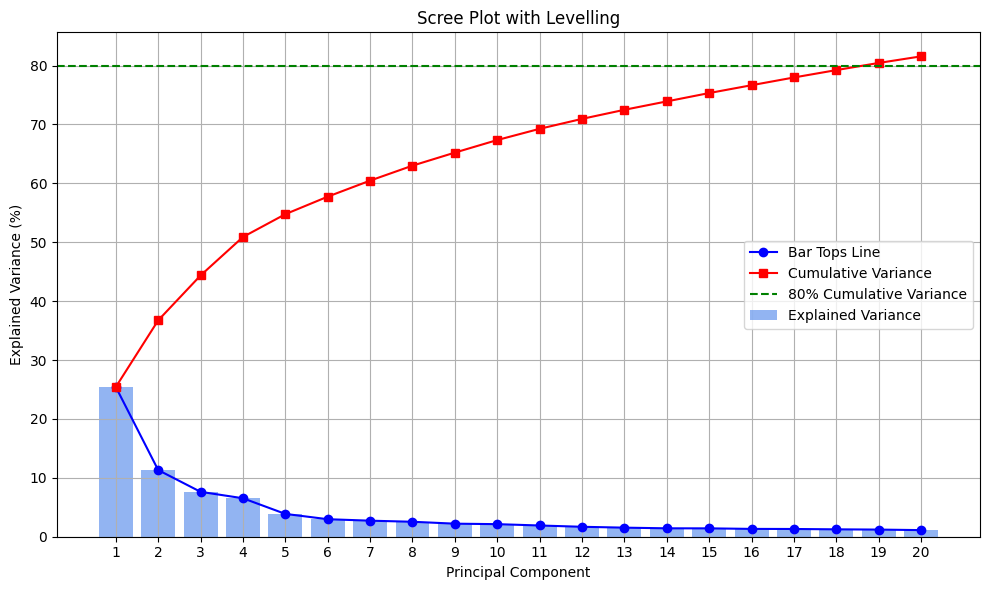

In [ ]:

explained_variance_ratio = pca.explained_variance_ratio_[:20]
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = len(explained_variance_ratio)
avg_explained = 1.0 / n_components  # average variance threshold

x_vals = np.arange(1, n_components + 1)
y_vals = explained_variance_ratio * 100

plt.figure(figsize=(10, 6))

plt.bar(x_vals, y_vals, alpha=0.7, color='cornflowerblue', label='Explained Variance')

plt.plot(x_vals, y_vals, marker='o', color='blue', label='Bar Tops Line')

plt.plot(x_vals, cumulative_variance * 100, marker='s', color='red', label='Cumulative Variance')

# 80% line
plt.axhline(y=80, color='green', linestyle='--', label='80% Cumulative Variance')

# Plot formatting
plt.title('Scree Plot with Levelling')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(x_vals)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
cutoff = 0.5

filtered_loading_df = loading_df[(loading_df.abs() >= cutoff).any(axis=1)]

print(filtered_loading_df)

pc = 'PC1'
print(filtered_loading_df[pc].sort_values(key=abs, ascending=False))

                                                         PC1       PC2  \
% Native Hawaiian or Other Pacific Islander        -0.015650  0.063438   
% in Transportation and warehousing, and utilities  0.039173 -0.026052   
% in Information                                   -0.051604  0.054517   
% in Other services, except public administration  -0.012378 -0.012629   

                                                         PC3       PC4  \
% Native Hawaiian or Other Pacific Islander         0.020822 -0.011944   
% in Transportation and warehousing, and utilities  0.105685  0.086090   
% in Information                                   -0.050118 -0.059990   
% in Other services, except public administration  -0.014791  0.008206   

                                                         PC5       PC6  \
% Native Hawaiian or Other Pacific Islander        -0.086581 -0.112515   
% in Transportation and warehousing, and utilities -0.130798  0.023075   
% in Information                    